Cluster labels distribution:
  1    78
 0    46
-1    26
Name: count, dtype: int64


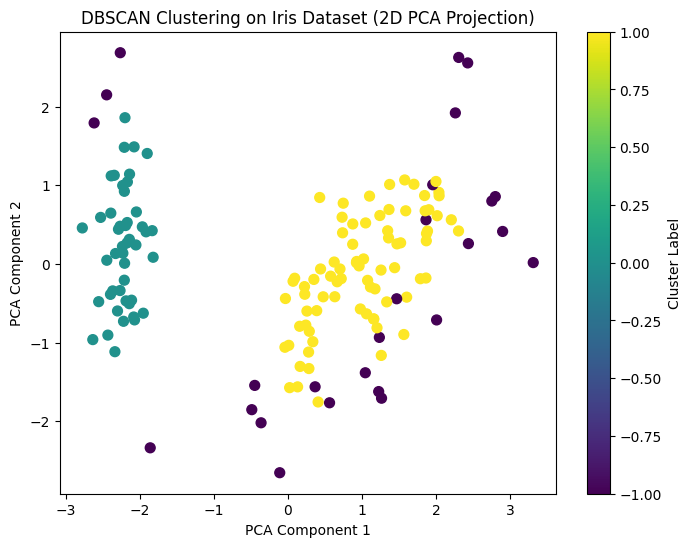

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Standardize the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply DBSCAN
# eps = neighborhood radius, min_samples = minimum points per cluster
dbscan = DBSCAN(eps=0.6, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# 4. Add cluster results to a DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['Cluster'] = clusters

# 5. Print cluster distribution
print("Cluster labels distribution:\n", pd.Series(clusters).value_counts())

# 6. Use PCA for visualization (reduce to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 7. Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=clusters, cmap='viridis', s=50
)
plt.title('DBSCAN Clustering on Iris Dataset (2D PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# 8. Display sample output
print(df.head())